# Analysis of Variance

#### Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures

In this project we will be analysing the variance by generating the own data for comparing more than 2 groups. 

Here, we will be creating a own data of races with age and compare with the voter's age. We will be doing the ANOVA and performing t-test on each pair. Finally we will perform pairwise_tukeyhsd 

### Importing the Necessary Libraries

In [1]:
# Importing the necessary Libraries

# Library for creating arrays
import numpy as np
# Library for dealing with dataframes 
import pandas as pd
# Library for plotting graphs
import matplotlib.pyplot as plt
# Library for statistical functions
import scipy.stats as stats
# Library for pairwise_tukeyhsd model
from statsmodels.stats.multicomp import pairwise_tukeyhsd

### Doing ANOVA for data with same mean

In [2]:
# Generating the random array
np.random.seed(12)

# Creating the column for race
races =   ["asian","black","hispanic","other","white","red"]

# Generate random data for voter_race 
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.10 ,0.25, 0.05, 0.5,0.05],
                              size=1000)
# Generate the data for voter_age by poisson process with random variates
voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

"Here we have created the groups with same mean"

# Group the voter_age data by voter_race and create the group
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Extract individual groups of race
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]
red = voter_age[groups["red"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white,red)

F_onewayResult(statistic=0.9992474219749592, pvalue=0.4169507381717259)

The test output yields an F-statistic of 1.774 and a p-value of 0.1317, which indicates that there is no significant difference between the means of each group.

### Doing ANOVA for data with same mean

In [3]:
# Generating the random array
np.random.seed(12)

# Generate random data for the voter_race
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.10 ,0.25, 0.05, 0.5, 0.05],
                              size=1000)

# Create data for white_ages with by poisson process with random variates with different mean
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

# Generate the data for voter_age by poisson process with random variates
voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Compare the whites_age and voter_age where the voter race is "white" 
voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group the voter_age data by voter_race and create the group
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups of race
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]
red = voter_age[groups["red"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white,red)

F_onewayResult(statistic=8.063504632370885, pvalue=1.8141841040387716e-07)

Here, we are doing the analysis with the white race with other races keeping the means different. Here, we know the data set so we are analysing for the positive variables only. In the real data, we will not know that. 

### Perform T_Test on each pair

In [4]:

# Get all race pairs using the for loop
race_pairs = []

for race1 in range(5):
    for race2  in range(race1+1,6):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair using for loop
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))   

asian black
Ttest_indResult(statistic=1.066832705495598, pvalue=0.28793754619868195)
asian hispanic
Ttest_indResult(statistic=-0.33877918718078126, pvalue=0.7350229469581708)
asian other
Ttest_indResult(statistic=0.006772864724701021, pvalue=0.9946105844490029)
asian white
Ttest_indResult(statistic=-2.2914351134949835, pvalue=0.02230863992673963)
asian red
Ttest_indResult(statistic=1.1983135840432235, pvalue=0.23397622406310178)
black hispanic
Ttest_indResult(statistic=-1.9058633327219765, pvalue=0.05751604669546656)
black other
Ttest_indResult(statistic=-0.9774909876399726, pvalue=0.32997688719434004)
black white
Ttest_indResult(statistic=-4.899822492333437, pvalue=1.2306973807225665e-06)
black red
Ttest_indResult(statistic=0.25749179408121803, pvalue=0.797179949829921)
hispanic other
Ttest_indResult(statistic=0.35101420250972537, pvalue=0.7258282382702971)
hispanic white
Ttest_indResult(statistic=-3.6763909997424324, pvalue=0.0002531573564451057)
hispanic red
Ttest_indResult(statisti

### Perform turkey pairwise test

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-1.0237,0.9,-3.9229,1.8755,False
asian,hispanic,0.3239,0.9,-2.2741,2.9219,False
asian,other,-0.0085,0.9,-3.2742,3.2573,False
asian,red,-1.2684,0.8805,-4.5979,2.0611,False
asian,white,1.8997,0.2496,-0.5926,4.392,False
black,hispanic,1.3476,0.3436,-0.577,3.2722,False
black,other,1.0152,0.9,-1.7451,3.7756,False
black,red,-0.2447,0.9,-3.0802,2.5908,False
black,white,2.9234,0.001,1.144,4.7028,True
hispanic,other,-0.3324,0.9,-2.7744,2.1097,False


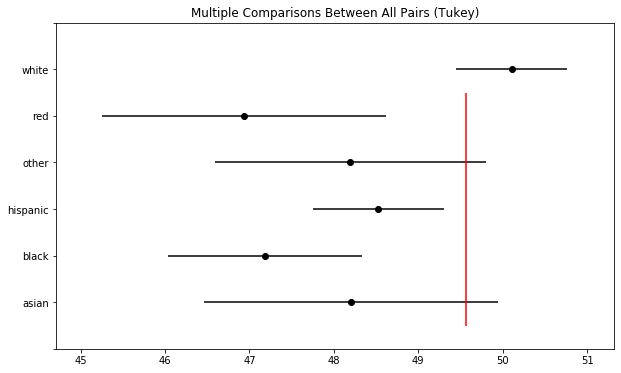

In [5]:
# Perform the turkey pairwise test
tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

# Plot the graph between them for the group confidence intervals
tukey.plot_simultaneous()   
# Plot a vertical line with parameters as x=49.57, ymin=-0.5, ymax=4.5, color="red"
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

# See the test summary
tukey.summary()             
